In [61]:
import os
# change to the root directory of the project
while os.getcwd().split('/')[-1] != 'spectral-properties-of-NN':
    os.chdir('..')
print(os.getcwd())

/home/nadezhda/Desktop/SEMESTER PROJECT/spectral-properties-of-NN


In [62]:
# arguments
import yaml
from omegaconf import OmegaConf
import torch
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
  ❓ <strong> Question: </strong> 

   How does the spectrum obtained from the Lanczos algorithm compare to the true spectrum?

</div>

## Experiment 01: Neural Network - MNIST - Layers: [784, 16, 10]

### 1. Untrained Model

In [63]:
EXPERIMENT = "01"
MODEL = "untrained"
LANCZOS = "slow"
HBS = 60000
ITER = 100

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")
# load the computed eigenvalues
lanczos_eigenvalues = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

Results directory: experiments/01/results/untrained/slow


In [64]:
# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"
print(f"Plot title: {plot_title}")

Plot title: Untrained - NeuralNetwork - MNIST - Layers: [784, 16, 10]


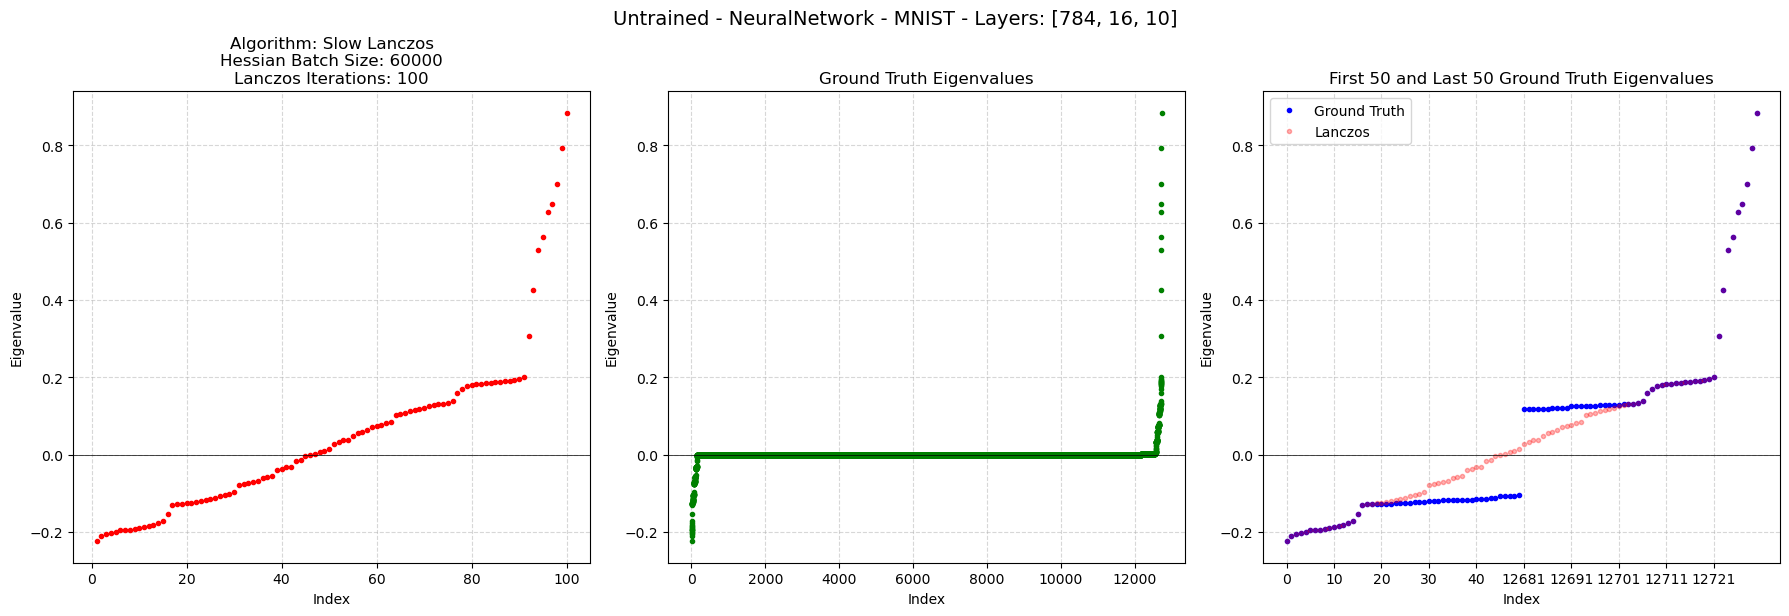

In [65]:
# create figure
plt.figure(figsize=(18, 6))

# plot lanczos eigenvalues
plt.subplot(1, 3, 1)
sorted_lanczos_eigenvalues = np.sort(lanczos_eigenvalues)
x_indices_lanczos = np.arange(1, len(sorted_lanczos_eigenvalues) + 1)
plt.plot(x_indices_lanczos, sorted_lanczos_eigenvalues, marker="o", linestyle="", color="red", markersize=3)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # add horizontal line at y=0
plt.title(f"Algorithm: {LANCZOS.capitalize()} Lanczos\nHessian Batch Size: {HBS}\nLanczos Iterations: {ITER}")
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.5, linestyle="--")

# plot ground truth eigenvalues
plt.subplot(1, 3, 2)
sorted_gt_eigenvalues = np.sort(gt_eigenvalues.numpy())
x_indices_gt = np.arange(1, len(sorted_gt_eigenvalues) + 1)
plt.plot(x_indices_gt, sorted_gt_eigenvalues, marker="o", linestyle="", color="green", markersize=3, label="Ground Truth")
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # add horizontal line at y=0
plt.title(f"Ground Truth Eigenvalues")
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.5, linestyle="--")

# plot first 50 and last 50 ground truth eigenvalues
plt.subplot(1, 3, 3)
first_50_gt_eigenvalues = sorted_gt_eigenvalues[:50]
last_50_gt_eigenvalues = sorted_gt_eigenvalues[-50:]
combined_gt_eigenvalues = np.concatenate((first_50_gt_eigenvalues, last_50_gt_eigenvalues))
x_indices_combined = np.arange(1, len(combined_gt_eigenvalues) + 1)  
x_labels = np.concatenate((np.arange(0, 50), np.arange(len(gt_eigenvalues) - 49, len(gt_eigenvalues))))
plt.plot(x_indices_combined, combined_gt_eigenvalues, marker="o", linestyle="", color="blue", markersize=3, label="Ground Truth")
plt.plot(x_indices_lanczos, sorted_lanczos_eigenvalues, marker="o", linestyle="", color="red", markersize=3, alpha=0.3, label="Lanczos")
plt.xticks(x_indices_combined[::10], x_labels[::10])  
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # add horizontal line at y=0
plt.title(f"First 50 and Last 50 Ground Truth Eigenvalues")
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True, alpha=0.5, linestyle="--")

plt.tight_layout()
plt.suptitle(plot_title, y=1.02, fontsize=14)
plt.show()

### 2. Trained model

In [66]:
EXPERIMENT = "01"
MODEL = "trained"
LANCZOS = "slow"
HBS = 60000
ITER = 100

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")
# load the computed eigenvalues
lanczos_eigenvalues = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

Results directory: experiments/01/results/trained/slow


In [67]:
# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"
print(f"Plot title: {plot_title}")

Plot title: Trained - NeuralNetwork - MNIST - Layers: [784, 16, 10]


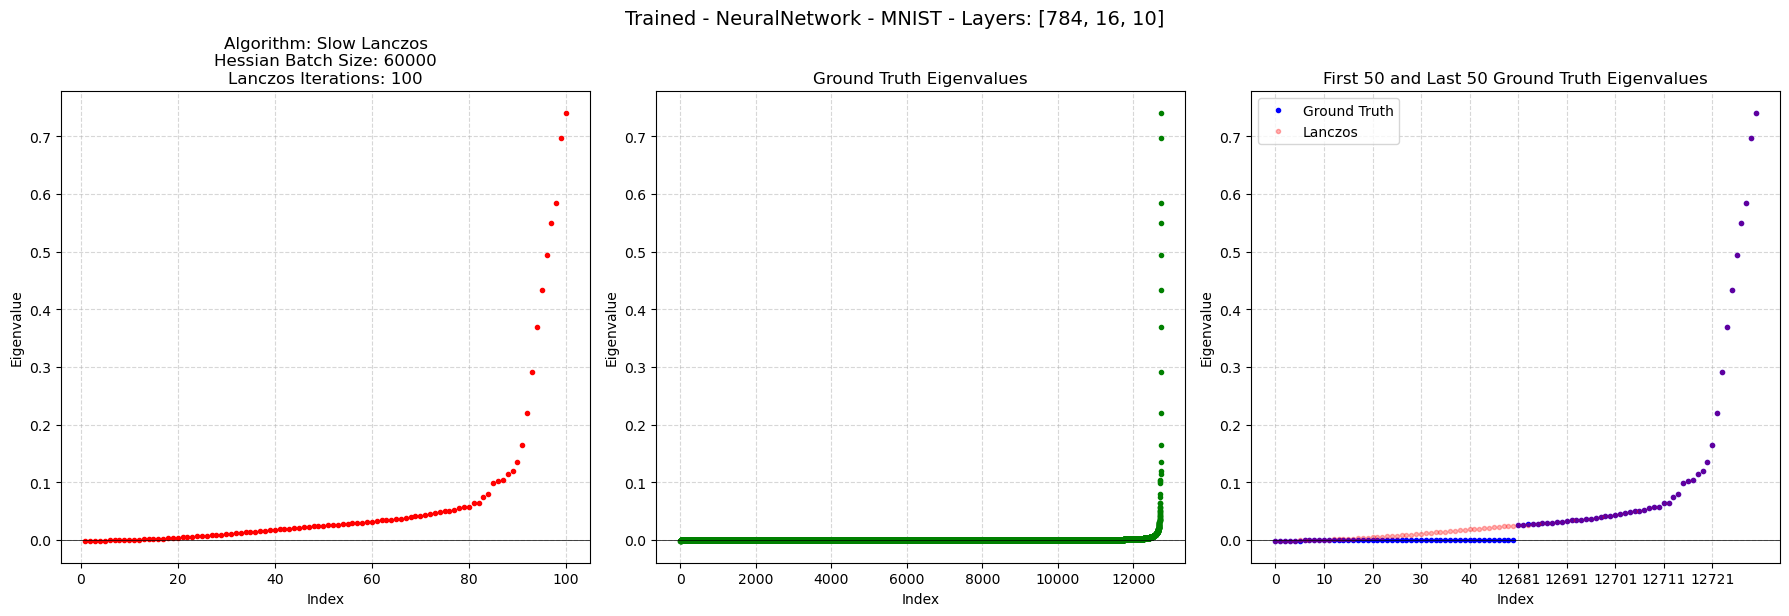

In [68]:
# create figure
plt.figure(figsize=(18, 6))

# plot lanczos eigenvalues
plt.subplot(1, 3, 1)
sorted_lanczos_eigenvalues = np.sort(lanczos_eigenvalues)
x_indices_lanczos = np.arange(1, len(sorted_lanczos_eigenvalues) + 1)
plt.plot(x_indices_lanczos, sorted_lanczos_eigenvalues, marker="o", linestyle="", color="red", markersize=3)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # add horizontal line at y=0
plt.title(f"Algorithm: {LANCZOS.capitalize()} Lanczos\nHessian Batch Size: {HBS}\nLanczos Iterations: {ITER}")
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.5, linestyle="--")

# plot ground truth eigenvalues
plt.subplot(1, 3, 2)
sorted_gt_eigenvalues = np.sort(gt_eigenvalues.numpy())
x_indices_gt = np.arange(1, len(sorted_gt_eigenvalues) + 1)
plt.plot(x_indices_gt, sorted_gt_eigenvalues, marker="o", linestyle="", color="green", markersize=3)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # add horizontal line at y=0
plt.title(f"Ground Truth Eigenvalues")
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True, alpha=0.5, linestyle="--")

# plot first 50 and last 50 ground truth eigenvalues
plt.subplot(1, 3, 3)
first_50_gt_eigenvalues = sorted_gt_eigenvalues[:50]
last_50_gt_eigenvalues = sorted_gt_eigenvalues[-50:]
combined_gt_eigenvalues = np.concatenate((first_50_gt_eigenvalues, last_50_gt_eigenvalues))
x_indices_combined = np.arange(1, len(combined_gt_eigenvalues) + 1)  
x_labels = np.concatenate((np.arange(0, 50), np.arange(len(gt_eigenvalues) - 49, len(gt_eigenvalues))))
plt.plot(x_indices_combined, combined_gt_eigenvalues, marker="o", linestyle="", color="blue", markersize=3, label="Ground Truth")
plt.plot(x_indices_lanczos, sorted_lanczos_eigenvalues, marker="o", linestyle="", color="red", markersize=3, alpha=0.3, label="Lanczos")
plt.xticks(x_indices_combined[::10], x_labels[::10])  
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # add horizontal line at y=0
plt.title(f"First 50 and Last 50 Ground Truth Eigenvalues")
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True, alpha=0.5, linestyle="--")

plt.tight_layout()
plt.suptitle(plot_title, y=1.02, fontsize=14)
plt.show()